# Counting site types to estimate activity

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
sys.path.append('../scripts')
from functions import *

from tqdm.notebook import tqdm

## Plotting a single activite site-count over a potential-range

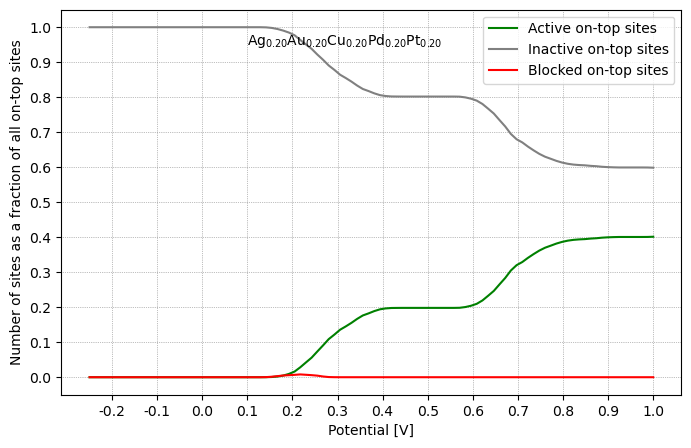

In [2]:
# Initialize a surface from a given stochiometry
dim_x, dim_y, split = 100, 100, [0.2 , 0.2 , 0.2 , 0.2 , 0.2 ]

HEA_surface = initialize_surface(dim_x, dim_y, metals, split)

# Predict energies on all sites for both adsorbates + mixed_sites
HEA_surface = precompute_binding_energies_SPEED2(HEA_surface, dim_x, dim_y, models)

# Calculate 
potential_range, active_list, inactive_list, blocked_list = counting_activity_scan(HEA_surface, -0.25, 1.0, 100)

# Plot and save
filename = "HEA_even.png"
counting_activity_plot(potential_range, active_list, inactive_list, blocked_list, split, filename)

## Evaluating activity with counting active sites for many molar fractions

In [ ]:
dim_x, dim_y = 100, 100
molar_fractions_005 = get_molar_fractions(0.05, 5)
molar_fractions_010 = get_molar_fractions(0.10, 5)

In [ ]:
active_list_list = []
inactive_list_list = []
blocked_list_list = []

molar_fractions = molar_fractions_010
Vmin, Vmax, n_points = 0.0, 0.6, 7

for stoichiometry in tqdm(molar_fractions):
    
    HEA_surface = initialize_surface(dim_x, dim_y, metals, stoichiometry)
    
    # Predict energies on all sites for both adsorbates + mixed_sites
    HEA_surface = precompute_binding_energies_SPEED2(HEA_surface, dim_x, dim_y, models)

    # Calculate
    potential_range, active_list, inactive_list, blocked_list = counting_activity_scan(HEA_surface, Vmin, Vmax, n_points)
    active_list_list.append(active_list)
    inactive_list_list.append(inactive_list)
    blocked_list_list.append(blocked_list)

In [ ]:
column_names = metals + ["Active", "Inactive", "Blocked"]
Ag_content = molar_fractions_010.T[0]
Au_content = molar_fractions_010.T[1]
Cu_content = molar_fractions_010.T[2]
Pd_content = molar_fractions_010.T[3]
Pt_content = molar_fractions_010.T[4]
# Lav lige et loop i stedet for 

for n in n_points:
    write_to_csv("../Counting_Activity/All_Fracs010_eU0"+str(n)+"0.csv", column_names, Ag_content, Au_content, Cu_content, Pd_content, Pt_content, np.array(active_list_list).T[n], np.array(inactive_list_list).T[n], np.array(blocked_list_list).T[n])

## Find most active composition at each potential

In [2]:
# Load one

# Find largest number of active sites and the index

# Find the composition at that index

# I want a function to just take the filename and return the optimal split at the given potential and the number of active sites
filename = "../Counting_Activity/All_Fracs010_eU060.csv"

optimal_active_sites, optimal_split = load_max_counting_activity(filename)

In [5]:
optimal_active_sites_list = []
optimal_split_list = []

for n in range(7):
    filename = "../Counting_Activity/All_Fracs010_eU0" + str(n) + "0.csv"
    optimal_active_sites, optimal_split = load_max_counting_activity(filename)
    optimal_active_sites_list.append(optimal_active_sites)
    optimal_split_list.append(optimal_split)

In [6]:
optimal_active_sites_list

[0, 0, 1838, 10000, 10000, 10000, 10000]

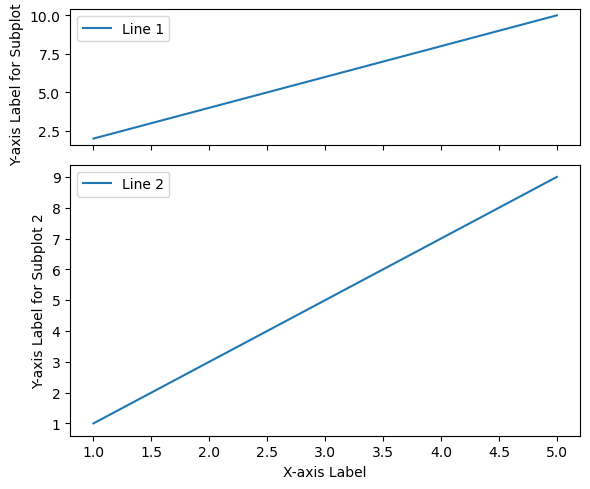

In [15]:
# Assuming you already have data to plot
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]
y2 = [1, 3, 5, 7, 9]

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(6, 5), gridspec_kw={'height_ratios': [1, 2]})

# Plot on the first subplot (ax1)
ax1.plot(x, y1, label='Line 1')
ax1.set_ylabel('Y-axis Label for Subplot 1')
ax1.legend()

# Plot on the second subplot (ax2)
ax2.plot(x, y2, label='Line 2')
ax2.set_xlabel('X-axis Label')
ax2.set_ylabel('Y-axis Label for Subplot 2')
ax2.legend()

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


In [20]:
stoch_to_string(optimal_split)

'Ag$_{0.00}$Au$_{0.00}$Cu$_{0.00}$Pd$_{0.00}$Pt$_{1.00}$'

## Triangle activity plots

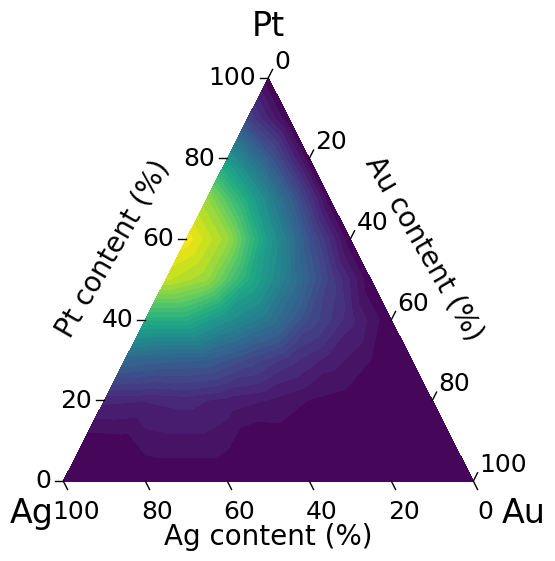

In [41]:
filename = "../Counting_Activity/All_Fracs010_eU020.csv"
df = pd.read_csv(filename)

active_list = df["Active"]

molar_fractions = np.array([np.array(df[metal]) for metal in metals]).T

# Create a mask based on the condition
mask = np.sum(molar_fractions[:, [0, 1, 4]], axis=1) == 1.0
molar_fractions_PtAgAu = molar_fractions[mask]
active_list_PtAgAu = active_list[mask]

molar_fractions_PtAgAu = remove_columns(molar_fractions_PtAgAu, [0, 1, 4])

#molar_fractions_PtAgAu = [molar_fractions[n] for n in range(len(molar_fractions)) if (molar_fractions[n][0]+molar_fractions[n][1]+molar_fractions[n][4])==1.0]
#molar_fractions_PtAgAu = remove_columns(molar_fractions_PtAgAu, [0, 1, 4])

fig, ax = make_empty_plot()

fs = molar_fractions_PtAgAu
zs = active_list_PtAgAu
ax = ax
elems = ["Ag", "Au", "Pt"]
filename = "AgAuPt_Ternary_Plot.png"
make_ternary_contour_plot(fs, zs, ax, elems, filename)


In [33]:


# Use the mask to select the corresponding molar fractions
selected_molar_fractions = molar_fractions[mask]


In [36]:
len(selected_molar_fractions)

62

62

array([0.3])

In [23]:
metals

['Ag', 'Au', 'Cu', 'Pd', 'Pt']

In [22]:
len(molar_fractions)

1001